In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
from classy import Class

In [2]:
z_pk = [200.0,100.0,75.0,50.0,10.0,5.0,0.0]
k_out = [0.0001,0.001, 0.01, 0.1,1]
z_Nbody = [0,50,100,500,1000,'50_g','50_r','100_g','100_r']
cosmo = {}
for key in z_Nbody:
    radiation_source = 1
    gamma_source = 1
    cosmo[key] = Class()
    if isinstance(key, basestring):
        #Key is a string
        tmp = key.split('_')
        print tmp
        z_init = float(tmp[0])
        if tmp[1]=='g':
            radiation_source = 0
        elif tmp[1]=='r':
            gamma_source = 0
    else:
        z_init = key
    cosmo[key].set({'output':'mPk dTk lTk', 
           'z_pk':str(z_pk).strip('[]'),
           'k_output_values':str(k_out).strip('[]'),
           'a_init_nbody': 1./(z_init+1.),
           'switch_radiation_source':radiation_source,
           'switch_gamma':gamma_source,
           'radiation_streaming_approximation':3,
           'ur_fluid_approximation':2,
           'l_max_g':100,
           'l_max_ur':100,
           'l_max_pol_g':100, 
           'reio_parametrization':'reio_none',
           'k_per_decade_for_pk':60,
           'k_per_decade_for_bao':120,
           'gauge' : 'Newtonian',
           'P_k_max_h/Mpc' : 1.,
           'evolver':0,
           'tol_perturb_integration':0.000001,
           'tol_background_integration':1e-8,
           'back_integration_stepsize':1e-3,
           'perturb_sampling_stepsize':0.01,
           'tol_thermo_integration':1e-5
            })
    cosmo[key].compute()


['50', 'g']
['50', 'r']
['100', 'g']
['100', 'r']


In [3]:
cc = cosmo[100] 
cc.pars
for key, val in cosmo[100].pars.iteritems():
    print key,' = ',val

P_k_max_h/Mpc  =  1.0
tol_background_integration  =  1e-08
perturb_sampling_stepsize  =  0.01
k_per_decade_for_bao  =  120
tol_thermo_integration  =  1e-05
gauge  =  Newtonian
switch_gamma  =  1
reio_parametrization  =  reio_none
back_integration_stepsize  =  0.001
evolver  =  0
radiation_streaming_approximation  =  3
switch_radiation_source  =  1
z_pk  =  200.0, 100.0, 75.0, 50.0, 10.0, 5.0, 0.0
k_per_decade_for_pk  =  60
k_output_values  =  0.0001, 0.001, 0.01, 0.1, 1
l_max_pol_g  =  100
tol_perturb_integration  =  1e-06
a_init_nbody  =  0.00990099009901
ur_fluid_approximation  =  2
output  =  mPk dTk lTk
l_max_ur  =  100
l_max_g  =  100


 reio affects the small k after z = 10, baryons affect the small scales significantly
 is there a sign difference between 3hc term?

In [4]:
for zsim in z_Nbody:
    cosmotmp = cosmo[zsim]
    for zpk in z_pk:
        seval = 'tks'+str(int(zpk))+'_'+str(zsim)+' = cosmotmp.get_transfer('+str(zpk)+')'
        print seval.split('=')[0]
        exec(seval)
    

tks200_0 
tks100_0 
tks75_0 
tks50_0 
tks10_0 
tks5_0 
tks0_0 
tks200_50 
tks100_50 
tks75_50 
tks50_50 
tks10_50 
tks5_50 
tks0_50 
tks200_100 
tks100_100 
tks75_100 
tks50_100 
tks10_100 
tks5_100 
tks0_100 
tks200_500 
tks100_500 
tks75_500 
tks50_500 
tks10_500 
tks5_500 
tks0_500 
tks200_1000 
tks100_1000 
tks75_1000 
tks50_1000 
tks10_1000 
tks5_1000 
tks0_1000 
tks200_50_g 
tks100_50_g 
tks75_50_g 
tks50_50_g 
tks10_50_g 
tks5_50_g 
tks0_50_g 
tks200_50_r 
tks100_50_r 
tks75_50_r 
tks50_50_r 
tks10_50_r 
tks5_50_r 
tks0_50_r 
tks200_100_g 
tks100_100_g 
tks75_100_g 
tks50_100_g 
tks10_100_g 
tks5_100_g 
tks0_100_g 
tks200_100_r 
tks100_100_r 
tks75_100_r 
tks50_100_r 
tks10_100_r 
tks5_100_r 
tks0_100_r 


In [5]:
pts0 = cosmo[0].get_perturbations()['scalar']
pts50 = cosmo[50].get_perturbations()['scalar']
pts100 = cosmo[100].get_perturbations()['scalar']
pts500 = cosmo[500].get_perturbations()['scalar']
print len(pts0)

print pts100[0].viewkeys()

5
dict_keys(['HCtheta_prime', 'L_prime', 'B_nm', 'A_nm', 'delta_ur', 'delta_cdm', 'theta_cdm', 'CHT_chi', 'theta_ur', 'HCAnb_prime', 'HCAnb', 'phi', 'psi', 'H_T_nm', 'shear_ur', 'HCtheta', 'L', 'delta_g', 'H_L_nm', 'delta_b', 'a', 'theta_g', 'pol0_g', 'theta_b', 'CHT_sigma', 'shear_g', 'tau [Mpc]', 'delta_N', 'pol2_g', 'pol1_g'])


In [6]:
figwidth1 = 4.4 #=0.7*6.3
figwidth2 = 6.3
ratio = 8.3/11.7
figheight1 = figwidth1*ratio
figheight2 = figwidth2*ratio

lw=2
fs=12
labelfs=16

0.0001
0.001
0.01
0.1
1


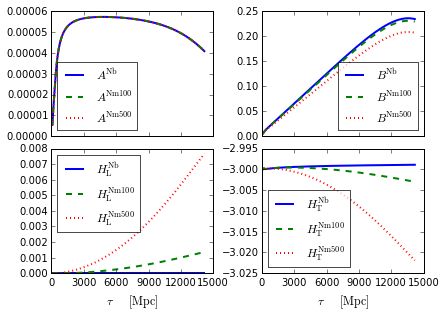

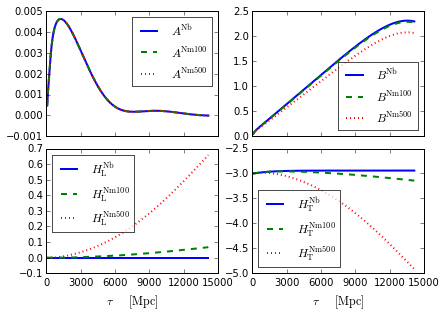

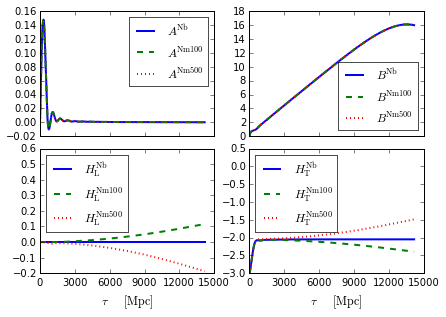

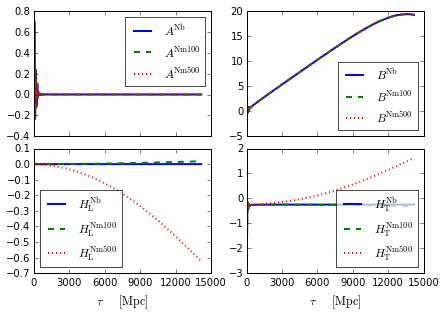

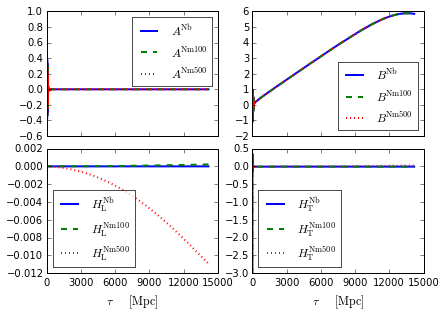

In [7]:
for xx in range(len(k_out)):
    pt0 = pts0[xx]
    pt50 = pts50[xx]
    pt100 = pts100[xx]
    pt500 = pts500[xx]
    
    print k_out[xx]

    tau100 = pt100['tau [Mpc]']
    tau500 = pt500['tau [Mpc]']
    tau50 = pt50['tau [Mpc]']
    tau0 = pt0['tau [Mpc]']

    Nx=2
    Ny=2

    f, axes = plt.subplots(2,2,sharex=True,figsize=(figwidth2,figheight2))

    pttype = [['A_nm','B_nm'],['H_L_nm','H_T_nm']]
    texnames = {'H_L_nm':r'H_\mathrm{L}','H_T_nm':r'H_\mathrm{T}','A_nm':'A','B_nm':'B'}
    
    #if xx==2:
    #    legpos = {'H_L_nm':r'upper left','H_T_nm':r'upper right','A_nm':'upper right','B_nm':'lower right'}
    #elif xx==0:
    #    legpos = {'H_L_nm':r'upper left','H_T_nm':r'upper left','A_nm':'lower right','B_nm':'lower right'}
    if xx==2:
        legpos = {'H_L_nm':'upper left','H_T_nm':'upper left','A_nm':'best','B_nm':'best'}
#        legpos = {'H_L_nm':'lower left','H_T_nm':'lower left','A_nm':'best','B_nm':'best'}
    else:
        legpos = {'H_L_nm':'best','H_T_nm':'best','A_nm':'best','B_nm':'best'}
    
    yscale = {'H_L_nm':'linear','H_T_nm':'linear','A_nm':'log','B_nm':'log'}

    ylimits = {'H_L_nm':[-0.01,0.2],'H_T_nm':[1.4,4.5],'A_nm':[1e-7,1e2],'B_nm':[1e-1,1e2]}


    
    def trsf(y,ptt):
        if ptt[0]=='H':
            return y
        else:
#            return np.abs(y)
            return y

    
    for i in range(Nx):
        for j in range(Ny):
            ptt = pttype[i][j]
            ax = axes[i][j]
                
            ax.plot(tau0,trsf(pt0[ptt],ptt),lw=lw)
            #ax.plot(tau50,trsf(pt50[ptt],ptt),ls='-.',lw=lw)
            ax.plot(tau100,trsf(pt100[ptt],ptt),ls='--',lw=lw)
            ax.plot(tau500,trsf(pt500[ptt],ptt),ls=':',lw=lw)
            leg = ['$'+texnames[ptt]+r'^\mathrm{Nb}$',
            #       '$'+texnames[ptt]+r'^\mathrm{Nm50}$',
                   '$'+texnames[ptt]+r'^\mathrm{Nm100}$',
                   '$'+texnames[ptt]+r'^\mathrm{Nm500}$']
            ax.legend(leg,ncol=1,loc=legpos[ptt],fontsize=fs, framealpha=0.7) #,labelspacing=0.2
            #ax.legend(leg,ncol=2,loc=legpos[ptt],fontsize=fs, framealpha=0.7,
            #         columnspacing=0.9,handletextpad=0.1)
            #,borderpad=0.2, labelspacing=0.1,  handletextpad=0.1, handlelength=0.004,borderaxespad=0.3) #,labelspacing=0.2
            ax.set_xlim([0,15000])
            #if xx==2:
            #    ax.set_ylim(ylimits[ptt])
            #elif ptt=='H_L_nm':
            #    yls = ax.get_ylim()
            #    ax.set_ylim([yls[0]-0.05*yls[1],yls[1]])
            #ax.set_yscale(yscale[ptt])
            if xx==1:
                if ptt=='H_L_nm':
                    ax.set_ylim([-0.1,0.7])
            elif xx==2:
                if ptt=='H_L_nm':
                    ax.set_ylim([-0.2,0.6])
                elif ptt=='H_T_nm':
                    ax.set_ylim([-3.0, 0.5])
            ax.set_xticks([k*3000 for k in range(6)])
    for j in range(2):
        axes[1,j].set_xlabel(r'$\tau\quad [\mathrm{Mpc}]$',fontsize=fs)
    f.tight_layout()
    if xx==0:
        f.subplots_adjust(wspace=0.3, hspace=0.1)
    else:
        f.subplots_adjust(wspace=0.2, hspace=0.1)
    fname = 'metricpotentialsk'+str(k_out[xx])+'.pdf'
    f.savefig(fname, bbox_inches='tight')  

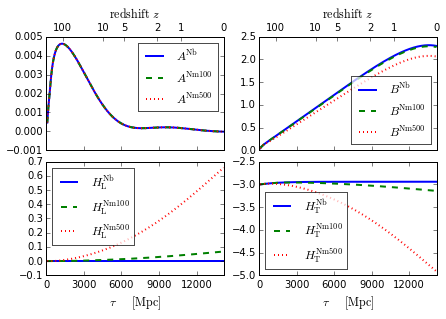

In [40]:
import scipy
from scipy.interpolate import interp1d
for xx in [1]:#range(len(k_out)):
    pt0 = pts0[xx]
    pt50 = pts50[xx]
    pt100 = pts100[xx]
    pt500 = pts500[xx]
    
    
    tau100 = pt100['tau [Mpc]']
    tau500 = pt500['tau [Mpc]']
    tau50 = pt50['tau [Mpc]']
    tau0 = pt0['tau [Mpc]']
    z0 = 1./pt0['a']-1
    z_of_tau = interp1d(tau0, z0)
    tau_of_z = interp1d(z0, tau0)
    def tick_function(X):
        V = z_of_tau(X)
        return ["%.1f" % z for z in V]
    
    
    Nx=2
    Ny=2

    f, axes = plt.subplots(2,2,sharex=True,figsize=(figwidth2,figheight2))

    pttype = [['A_nm','B_nm'],['H_L_nm','H_T_nm']]
    texnames = {'H_L_nm':r'H_\mathrm{L}','H_T_nm':r'H_\mathrm{T}','A_nm':'A','B_nm':'B'}
    
    #if xx==2:
    #    legpos = {'H_L_nm':r'upper left','H_T_nm':r'upper right','A_nm':'upper right','B_nm':'lower right'}
    #elif xx==0:
    #    legpos = {'H_L_nm':r'upper left','H_T_nm':r'upper left','A_nm':'lower right','B_nm':'lower right'}
    if xx==2:
        legpos = {'H_L_nm':'upper left','H_T_nm':'upper left','A_nm':'best','B_nm':'best'}
#        legpos = {'H_L_nm':'lower left','H_T_nm':'lower left','A_nm':'best','B_nm':'best'}
    else:
        legpos = {'H_L_nm':'best','H_T_nm':'best','A_nm':'best','B_nm':'best'}
    
    yscale = {'H_L_nm':'linear','H_T_nm':'linear','A_nm':'log','B_nm':'log'}

    ylimits = {'H_L_nm':[-0.01,0.2],'H_T_nm':[1.4,4.5],'A_nm':[1e-7,1e2],'B_nm':[1e-1,1e2]}


    
    def trsf(y,ptt):
        if ptt[0]=='H':
            return y
        else:
#            return np.abs(y)
            return y

    
    for i in range(Nx):
        for j in range(Ny):
            ptt = pttype[i][j]
            ax = axes[i][j]
                
            ax.plot(tau0,trsf(pt0[ptt],ptt),lw=lw)
            #ax.plot(tau50,trsf(pt50[ptt],ptt),ls='-.',lw=lw)
            ax.plot(tau100,trsf(pt100[ptt],ptt),ls='--',lw=lw)
            ax.plot(tau500,trsf(pt500[ptt],ptt),ls=':',lw=lw)
            leg = ['$'+texnames[ptt]+r'^\mathrm{Nb}$',
            #       '$'+texnames[ptt]+r'^\mathrm{Nm50}$',
                   '$'+texnames[ptt]+r'^\mathrm{Nm100}$',
                   '$'+texnames[ptt]+r'^\mathrm{Nm500}$']
            ax.legend(leg,ncol=1,loc=legpos[ptt],fontsize=fs, framealpha=0.7) #,labelspacing=0.2
            #ax.legend(leg,ncol=2,loc=legpos[ptt],fontsize=fs, framealpha=0.7,
            #         columnspacing=0.9,handletextpad=0.1)
            #,borderpad=0.2, labelspacing=0.1,  handletextpad=0.1, handlelength=0.004,borderaxespad=0.3) #,labelspacing=0.2
            
            #ax.set_xlim([0,15000])
            
            #if xx==2:
            #    ax.set_ylim(ylimits[ptt])
            #elif ptt=='H_L_nm':
            #    yls = ax.get_ylim()
            #    ax.set_ylim([yls[0]-0.05*yls[1],yls[1]])
            #ax.set_yscale(yscale[ptt])
            if xx==1:
                if ptt=='H_L_nm':
                    ax.set_ylim([-0.1,0.7])
            elif xx==2:
                if ptt=='H_L_nm':
                    ax.set_ylim([-0.2,0.6])
                elif ptt=='H_T_nm':
                    ax.set_ylim([-3.0, 0.5])
            theticks = [k*3000 for k in range(6)]
            
            ax.set_xticks(theticks)
            ax.set_xlim([0,max(tau0)])
            
            #Try to add second axis
            if i==0:
                ax2 = ax.twiny()
#                new_tick_locations = np.array([3000, 6000, 9000, 12000, max(tau0)])
                zticks = [100,10,5,2,1,0]
                new_tick_locations = tau_of_z(zticks)
                ax2.set_xticks(new_tick_locations)
                #ax2.set_xticklabels(tick_function(new_tick_locations))
                ax2.set_xticklabels(zticks)
                ax2.set_xlabel(r'$\mathrm{redshift}\,z$',fontsize=fs)


            #ax.set_xscale('log')
    for j in range(2):
        axes[1,j].set_xlabel(r'$\tau\quad [\mathrm{Mpc}]$',fontsize=fs)
    f.tight_layout()
    if xx==0:
        f.subplots_adjust(wspace=0.3, hspace=0.1)
    else:
        f.subplots_adjust(wspace=0.2, hspace=0.1)
    fname = 'Zmetricpotentialsk'+str(k_out[xx])+'.pdf'
    f.savefig(fname, bbox_inches='tight')  
  

In [12]:
print pt0.viewkeys()

dict_keys(['HCtheta_prime', 'L_prime', 'B_nm', 'A_nm', 'delta_ur', 'delta_cdm', 'theta_cdm', 'CHT_chi', 'theta_ur', 'HCAnb_prime', 'HCAnb', 'phi', 'psi', 'H_T_nm', 'shear_ur', 'HCtheta', 'L', 'delta_g', 'H_L_nm', 'delta_b', 'a', 'theta_g', 'pol0_g', 'theta_b', 'CHT_sigma', 'shear_g', 'tau [Mpc]', 'delta_N', 'pol2_g', 'pol1_g'])


/Users/thomas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: overflow encountered in square
/Users/thomas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:17: RuntimeWarning: overflow encountered in square


ValueError: Data has no positive values, and therefore can not be log-scaled.

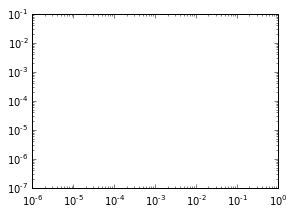

In [8]:
h = cosmo[500].h()
pm = cosmo[500].get_primordial()
pk_prim = interp1d(pm['k [1/Mpc]'],pm['P_scalar(k)'])
def get_H_L_contribution(tk):
    k = tk['k (h/Mpc)']*h
    factor = 2*np.pi**2*pk_prim(k)/k**3
    return k,factor*np.abs((tk['L_prime']- k*tk['L'])**2 - tk['L_prime']**2)

f, axes = plt.subplots(1,1,figsize=(figwidth1,figheight1))
k,tks0_0['L_prime']**2/k**3

k = tks0_0['k (h/Mpc)']*h

pk = [cosmo[500].pk(kk,0.) for kk in k]

factor = 2*np.pi**2*pk_prim(k)/k**3
axes.loglog(k,factor*tks0_0['L_prime']**2)
#axes.loglog(k,pk)
axes.loglog(*get_H_L_contribution(tks0_500))
axes.loglog(*get_H_L_contribution(tks0_100))
axes.loglog(*get_H_L_contribution(tks0_50))

axes.set_xlim(1e-5,1e0)
axes.set_ylim(1e-2,1e6)
axes.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
axes.set_ylabel(r'$P(k)\quad [\mathrm{Mpc}^{3}]$',fontsize=fs)
#leg = [r'$\left|\delta^\mathrm{Nm}\right|^2=\hspace{0.5}\left|\delta^\mathrm{Nb}\right|^2$']
leg = [r'$|\delta^\mathrm{Nm}|^2=\hspace{0.3}|\delta^\mathrm{Nb}|^2$']
for zini in [500,100,50]:
    leg.append(r'$|\delta^\mathrm{Nm}|^2-\hspace{0.3}|\delta^\mathrm{N'+str(zini)+r'}|^2$')
l = axes.legend(leg,loc='upper left',fontsize=fs,ncol=1,bbox_to_anchor=(1., 1.04))
f.tight_layout()
f.savefig('HLcontribution.pdf', bbox_inches='tight',bbox_extra_artists=(l,))  


In [ ]:
f, axes = plt.subplots(1,2,figsize=(figwidth2,0.9*figheight1),sharex=True, sharey=True)
h = cosmo[50].h()
axes[0].semilogx(tks0_50['k (h/Mpc)']/h,tks0_50['L'] ,lw=1)
axes[0].semilogx(tks0_50_r['k (h/Mpc)']/h,tks0_50_r['L'] ,lw=lw,ls='--')
axes[0].semilogx(tks0_50_g['k (h/Mpc)']/h,tks0_50_g['L'] ,lw=lw,ls=':')

axes[1].semilogx(tks0_100['k (h/Mpc)']/h,tks0_100['L'] ,lw=1)
axes[1].semilogx(tks0_100_r['k (h/Mpc)']/h,tks0_100_r['L'] ,lw=lw,ls='--')
axes[1].semilogx(tks0_100_g['k (h/Mpc)']/h,tks0_100_g['L'] ,lw=lw,ls=':')

axes[0].set_xlim([1e-4,1e-1])

leg = [r'$L_\mathrm{tot}$', r'$L_{\delta_\mathrm{other}}$', r'$L_\gamma$']

zini = [50,100]
for j in [0,1]:
    ax = axes[j]
    ax.set_yscale('symlog',linthreshy=1)
    ax.set_ylim([-1e3,1e3])
    ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
    ax.legend(leg,loc='lower left',fontsize=fs,ncol=1,fancybox=False, framealpha=0.7)
    ax.set_title(r'$z_\mathrm{ini}='+str(zini[j])+'$',fontsize=fs)
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
#axes[0].set_ylim([1e-1,1e3])
f.tight_layout()
f.subplots_adjust(wspace=0.15)
f.savefig('LTransferContributions.pdf', bbox_inches='tight')  

In [ ]:
f, axes = plt.subplots(1,2,figsize=(figwidth2,0.9*figheight1),sharex=True, sharey=True)
h = cosmo[50].h()
axes[0].semilogx(tks0_50['k (h/Mpc)']/h,np.abs(tks0_50['L']) ,lw=1)
axes[0].semilogx(tks0_50_r['k (h/Mpc)']/h,np.abs(tks0_50_r['L']) ,lw=lw,ls='--')
axes[0].semilogx(tks0_50_g['k (h/Mpc)']/h,np.abs(tks0_50_g['L']) ,lw=lw,ls=':')

axes[1].semilogx(tks0_100['k (h/Mpc)']/h,np.abs(tks0_100['L']) ,lw=1)
axes[1].semilogx(tks0_100_r['k (h/Mpc)']/h,np.abs(tks0_100_r['L']) ,lw=lw,ls='--')
axes[1].semilogx(tks0_100_g['k (h/Mpc)']/h,np.abs(tks0_100_g['L']) ,lw=lw,ls=':')

axes[0].set_xlim([1e-4,1e-1])

leg = [r'$L_\mathrm{tot}$', r'$L_\gamma$', r'$L_{\delta_\mathrm{other}}$']

zini = [50,100]
for j in [0,1]:
    ax = axes[j]
    ax.set_yscale('log')
    ax.set_ylim([1e-3,1e3])
    ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
    ax.legend(leg,loc='lower left',fontsize=fs,ncol=1,fancybox=False, framealpha=0.7)
    ax.set_title(r'$z_\mathrm{ini}='+str(zini[j])+'$',fontsize=fs)
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
#axes[0].set_ylim([1e-1,1e3])
f.tight_layout()
f.subplots_adjust(wspace=0.15)
f.savefig('LTransferContributionsAbs.pdf', bbox_inches='tight')  

In [ ]:
f, axes = plt.subplots(1,2,figsize=(figwidth2,0.9*figheight1),sharex=True, sharey=True)
h = cosmo[50].h()

def get_k_and_L(tk):
    return tk['k (h/Mpc)']/h,tk['L']

axes[0].semilogx(*get_k_and_L(tks0_100),lw=1)
axes[0].semilogx(*get_k_and_L(tks10_100),lw=1)
axes[0].semilogx(*get_k_and_L(tks50_100),lw=1)
axes[0].semilogx(*get_k_and_L(tks75_100),lw=1)

axes[1].semilogx(*get_k_and_L(tks0_500),lw=1)
axes[1].semilogx(*get_k_and_L(tks10_500),lw=1)
axes[1].semilogx(*get_k_and_L(tks100_500),lw=1)
axes[1].semilogx(*get_k_and_L(tks200_500),lw=1)


axes[0].set_xlim([1e-4,1e0])

zvecs = [[0,10,50,75],[0,10,100,200]]



zini = [100,500]
for j in [0,1]:
    ax = axes[j]
    ax.set_yscale('symlog',linthreshy=1)
    ax.set_ylim([-1e3,1e3])
    ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
    leg = [r'$L(z='+str(z)+')$' for z in zvecs[j]]
    ax.legend(leg,loc='lower center',fontsize=fs,ncol=2,fancybox=False, framealpha=0.7,
             columnspacing=0.9,
              borderpad=0.2,
              labelspacing=0.1, 
              #handlelength=0.004,
              handletextpad=0.1,
              #borderaxespad=0.3
             )
    ax.set_title(r'$z_\mathrm{ini}='+str(zini[j])+'$',fontsize=fs)
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
axes[0].set_ylim([-1e5,1e4])
f.tight_layout()
f.subplots_adjust(wspace=0.15)
f.savefig('LTransferEvolution.pdf', bbox_inches='tight') 

In [ ]:
f, axes = plt.subplots(2,2,figsize=(figwidth2,figheight2),sharex=True, sharey=False)
h = cosmo[50].h()

def get_k_and_L(tk):
    return tk['k (h/Mpc)']/h,tk['L']
def get_k_and_L_rescaled(tk):
    #tks0_100['L_prime']/tks5_100['L_prime']  *tks5_100['L']
    rescale = tk0['L_prime']/tk['L_prime']
#    return tk['k (h/Mpc)']/h,np.abs(tk['L']*rescale)
    return tk['k (h/Mpc)']/h,tk['L']*rescale

axes[0,0].semilogx(*get_k_and_L(tks0_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks10_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks50_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks75_100),lw=1)

axes[0,1].semilogx(*get_k_and_L(tks0_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks10_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks100_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks200_500),lw=1)

tk0 = tks0_100
axes[1,0].semilogx(*get_k_and_L_rescaled(tks0_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks10_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks50_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks75_100),lw=1)

tk0 = tks0_500
axes[1,1].semilogx(*get_k_and_L_rescaled(tks0_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks10_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks100_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks200_500),lw=1)

axes[0,0].set_xlim([1e-4,1e0])

zvecs = [[0,10,50,75],[0,10,100,200]]



zini = [100,500]
for j in [0,1]:
    for m in [0,1]:
        ax = axes[m,j]
        if m==0:
            leg = [r'$L(z='+str(z)+')$' for z in zvecs[j]]
            ax.set_yscale('symlog',linthreshy=1)
            ax.set_ylim([-1e5,1e4])
        elif m==1:
            leg = [r'$\hat{L}(z='+str(z)+')$' for z in zvecs[j]]
            ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
#            ax.set_yscale('log')
#            ax.set_ylim([1e-4,1e4])
            ax.set_yscale('linear')
            if j==0:
                ax.set_ylim([-250,250])
            elif j==1:
                ax.set_ylim([-3500,3500])
        ax.legend(leg,loc='lower center',fontsize=fs,ncol=2,fancybox=False, framealpha=0.7,
             columnspacing=0.9,
              borderpad=0.2,
              labelspacing=0.1, 
              handlelength=1.5,
              handletextpad=0.1,
              #borderaxespad=0.3
             )
        if m==0:
            ax.set_title(r'$z_\mathrm{ini}='+str(zini[j])+'$',fontsize=fs)
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
axes[0,0].set_ylim([-1e5,1e4])
f.tight_layout()
f.subplots_adjust(hspace=0.1,wspace=0.3)
f.savefig('LTransferEvolution2x2.pdf', bbox_inches='tight') 

In [ ]:
f, axes = plt.subplots(2,2,figsize=(figwidth2,figheight2),sharex=True, sharey=False)
h = cosmo[50].h()

def get_k_and_L(tk):
    return tk['k (h/Mpc)']/h,np.abs(tk['L'])
def get_k_and_L_rescaled(tk):
    #tks0_100['L_prime']/tks5_100['L_prime']  *tks5_100['L']
    rescale = tk0['L_prime']/tk['L_prime']
#    return tk['k (h/Mpc)']/h,np.abs(tk['L']*rescale)
    return tk['k (h/Mpc)']/h,tk['L']*rescale

axes[0,0].semilogx(*get_k_and_L(tks0_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks10_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks50_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks75_100),lw=1)

axes[0,1].semilogx(*get_k_and_L(tks0_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks10_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks100_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks200_500),lw=1)

tk0 = tks0_100
axes[1,0].semilogx(*get_k_and_L_rescaled(tks0_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks10_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks50_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks75_100),lw=1)

tk0 = tks0_500
axes[1,1].semilogx(*get_k_and_L_rescaled(tks0_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks10_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks100_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks200_500),lw=1)

axes[0,0].set_xlim([1e-4,1e0])

zvecs = [[0,10,50,75],[0,10,100,200]]



zini = [100,500]
for j in [0,1]:
    for m in [0,1]:
        ax = axes[m,j]
        if m==0:
            leg = [r'$|L(z='+str(z)+')|$' for z in zvecs[j]]
            ax.set_yscale('log')
            ax.set_ylim([1e-5,1e4])
        elif m==1:
            leg = [r'$\hat{L}(z='+str(z)+')$' for z in zvecs[j]]
            ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
#            ax.set_yscale('log')
#            ax.set_ylim([1e-4,1e4])
            ax.set_yscale('linear')
            if j==0:
                ax.set_ylim([-250,250])
            elif j==1:
                ax.set_ylim([-3500,3500])
        ax.legend(leg,loc='lower center',fontsize=fs,ncol=2,fancybox=False, framealpha=0.7,
             columnspacing=0.8,
              borderpad=0.2,
              labelspacing=0.1, 
              handlelength=1.5,
              handletextpad=0.1,
              #borderaxespad=0.3
             )
        if m==0:
            ax.set_title(r'$z_\mathrm{ini}='+str(zini[j])+'$',fontsize=fs)
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
f.tight_layout()
f.subplots_adjust(hspace=0.1,wspace=0.25)
f.savefig('LTransferEvolution2x2abs.pdf', bbox_inches='tight') 

In [ ]:
f, axes = plt.subplots(2,2,figsize=(figwidth2,figheight2),sharex=True, sharey=False)
h = cosmo[50].h()

def get_k_and_L(tk):
    return tk['k (h/Mpc)']/h,tk['L']
def get_k_and_L_rescaled(tk):
    #tks0_100['L_prime']/tks5_100['L_prime']  *tks5_100['L']
    rescale = tk0['L_prime']/tk['L_prime']
#    return tk['k (h/Mpc)']/h,np.abs(tk['L']*rescale)
    return tk['k (h/Mpc)']/h,tk['L']*rescale

axes[0,0].semilogx(*get_k_and_L(tks0_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks5_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks10_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks50_100),lw=1)

axes[0,1].semilogx(*get_k_and_L(tks0_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks5_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks10_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks50_500),lw=1)

tk0 = tks0_100
axes[1,0].semilogx(*get_k_and_L_rescaled(tks0_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks10_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks50_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks75_100),lw=1)

tk0 = tks0_500
axes[1,1].semilogx(*get_k_and_L_rescaled(tks0_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks10_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks100_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks200_500),lw=1)

axes[0,0].set_xlim([1e-4,1e0])





zini = [100,500]
for j in [0,1]:
    for m in [0,1]:
        ax = axes[m,j]
        if m==0:
            zvecs = [[0,5,10,50],[0,5,10,50]]
            leg = [r'$L(z='+str(z)+')$' for z in zvecs[j]]
            ax.set_yscale('linear')
            #ax.set_ylim([-1e5,1e4])
        elif m==1:
            zvecs = [[0,10,50,75],[0,10,100,200]]
            leg = [r'$\hat{L}(z='+str(z)+')$' for z in zvecs[j]]
            ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
#            ax.set_yscale('log')
#            ax.set_ylim([1e-4,1e4])
            ax.set_yscale('linear')
            if j==0:
                ax.set_ylim([-50,450])
            elif j==1:
                ax.set_ylim([-500,5500])
        ax.legend(leg,loc='upper center',fontsize=fs,ncol=2,fancybox=False, framealpha=0.7,
             columnspacing=0.9,
              borderpad=0.2,
              labelspacing=0.1, 
              handlelength=1.5,
              handletextpad=0.1,
              #borderaxespad=0.3
             )
        if m==0:
            ax.set_title(r'$z_\mathrm{ini}='+str(zini[j])+'$',fontsize=fs)
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
f.tight_layout()
f.subplots_adjust(hspace=0.1,wspace=0.3)
f.savefig('LTransferEvolution2x2lin.pdf', bbox_inches='tight') 

In [ ]:
f, axes = plt.subplots(2,2,figsize=(figwidth2,figheight2),sharex=True, sharey='row')
h = cosmo[50].h()

def get_k_and_L(tk):
    return tk['k (h/Mpc)']/h,tk['L']
def get_k_and_L_rescaled(tk):
    #tks0_100['L_prime']/tks5_100['L_prime']  *tks5_100['L']
    rescale = tk0['L_prime']/tk['L_prime']
#    return tk['k (h/Mpc)']/h,np.abs(tk['L']*rescale)
    return tk['k (h/Mpc)']/h,tk['L']*rescale

axes[0,0].semilogx(*get_k_and_L(tks0_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks5_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks10_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks50_100),lw=1)

axes[1,0].semilogx(*get_k_and_L(tks0_500),lw=1)
axes[1,0].semilogx(*get_k_and_L(tks5_500),lw=1)
axes[1,0].semilogx(*get_k_and_L(tks10_500),lw=1)
axes[1,0].semilogx(*get_k_and_L(tks50_500),lw=1)

tk0 = tks0_100
axes[0,1].semilogx(*get_k_and_L_rescaled(tks0_100),lw=1)
axes[0,1].semilogx(*get_k_and_L_rescaled(tks10_100),lw=1)
axes[0,1].semilogx(*get_k_and_L_rescaled(tks50_100),lw=1)
axes[0,1].semilogx(*get_k_and_L_rescaled(tks75_100),lw=1)

tk0 = tks0_500
axes[1,1].semilogx(*get_k_and_L_rescaled(tks0_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks10_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks100_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks200_500),lw=1)

axes[0,0].set_xlim([1e-4,1e0])


zvecs = [[[],[]],[[],[]]]
zvecs[0][0] = [0,5,10,50]
zvecs[1][0] = [0,5,10,50]
zvecs[0][1] = [0,10,50,75]
zvecs[1][1] = [0,10,100,200]



zini = [100,500]
for j in [0,1]:
    for m in [0,1]:
        ax = axes[m,j]
        ax.set_yscale('linear')
        leg = [r'$z='+str(z)+'$' for z in zvecs[m][j]]
        if j==0:
            ax.set_ylabel(r'$z_\mathrm{ini}='+str(zini[m])+'$',fontsize=fs)
        if m==0:
            tits = [r'$L$',r'$\hat{L}$']
            ax.set_title(tits[j],fontsize=fs)
            ax.set_ylim([-50,250])
        elif m==1:
            ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
            ax.set_ylim([-500,4500])
        
        ax.legend(leg,loc='upper right',fontsize=fs,ncol=1,fancybox=False, framealpha=0.7,
             #columnspacing=0.9,
              borderpad=0.2,
              labelspacing=0.2, 
              handlelength=1.5,
              handletextpad=0.1,
              #borderaxespad=0.3
             )
        
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
f.tight_layout()
f.subplots_adjust(hspace=0.1,wspace=0.1)
f.savefig('LTransferEvolution2x2lin2.pdf', bbox_inches='tight') 

In [ ]:
f, axes = plt.subplots(2,2,figsize=(figwidth2,figheight2),sharex=True, sharey='col')
h = cosmo[50].h()

def get_k_and_L(tk):
    return tk['k (h/Mpc)']/h,tk['L']
def get_k_and_L_rescaled(tk):
    #tks0_100['L_prime']/tks5_100['L_prime']  *tks5_100['L']
    rescale = tk0['L_prime']/tk['L_prime']
#    return tk['k (h/Mpc)']/h,np.abs(tk['L']*rescale)
    return tk['k (h/Mpc)']/h,tk['L']*rescale

axes[0,0].semilogx(*get_k_and_L(tks0_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks5_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks10_100),lw=1)
axes[0,0].semilogx(*get_k_and_L(tks50_100),lw=1)

axes[0,1].semilogx(*get_k_and_L(tks0_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks5_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks10_500),lw=1)
axes[0,1].semilogx(*get_k_and_L(tks50_500),lw=1)

tk0 = tks0_100
axes[1,0].semilogx(*get_k_and_L_rescaled(tks0_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks10_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks50_100),lw=1)
axes[1,0].semilogx(*get_k_and_L_rescaled(tks75_100),lw=1)

tk0 = tks0_500
axes[1,1].semilogx(*get_k_and_L_rescaled(tks0_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks10_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks100_500),lw=1)
axes[1,1].semilogx(*get_k_and_L_rescaled(tks200_500),lw=1)

axes[0,0].set_xlim([1e-4,1e0])


zvecs = [[[],[]],[[],[]]]
zvecs[0][0] = [0,5,10,50]
zvecs[1][0] = [0,5,10,50]
zvecs[0][1] = [0,10,50,75]
zvecs[1][1] = [0,10,100,200]



zini = [100,500]
ylabs = [r'$L^{{\rm Nm}\to{\rm Nb}}$',r'$\hat{L}^{{\rm Nm}\to{\rm Nb}}$']
for j in [0,1]:
    for m in [0,1]:
        ax = axes[m,j]
        ax.set_yscale('linear')
        leg = [r'$z='+str(z)+'$' for z in zvecs[m][j]]
        if j==0:
            ax.set_ylabel(ylabs[m],fontsize=fs)
        if m==0:
            ax.set_title(r'$z_\mathrm{ini}='+str(zini[j])+'$',fontsize=fs)
            #ax.set_ylim([-50,250])
        elif m==1:
            ax.set_xlabel(r'$k\quad [\mathrm{Mpc}^{-1}]$',fontsize=fs)
            #ax.set_ylim([-500,4500])
        
        ax.legend(leg,loc='upper right',fontsize=fs,ncol=1,fancybox=False, framealpha=0.7,
             #columnspacing=0.9,
              borderpad=0.2,
              labelspacing=0.2, 
              handlelength=1.5,
              handletextpad=0.1,
              #borderaxespad=0.3
             )
axes[1,1].set_ylim([-500,4500])     
#l = axes[1].legend(leg,loc='lower right',fontsize=fs,ncol=3,bbox_to_anchor=(1., 1.04))
f.tight_layout()
f.subplots_adjust(hspace=0.1,wspace=0.3)
f.savefig('LTransferEvolution2x2lin3.pdf', bbox_inches='tight') 

In [ ]:
k = tks0_100['k (h/Mpc)']*cosmo[500].h()
plt.loglog(
           k,np.abs((tks0_500['L_prime']- k*tks0_500['L'])**2/k**3 
                    - tks0_500['L_prime']**2/k**3),'r',
           k,np.abs((tks0_100['L_prime']- k*tks0_100['L'])**2/k**3 
                    - tks0_100['L_prime']**2/k**3),'r--',
           k,np.abs((tks0_50['L_prime']- k*tks0_50['L'])**2/k**3 
                    - tks0_50['L_prime']**2/k**3),'r:',
           k,tks0_0['L_prime']**2/k**3,'b'
            )
plt.ylim([10000000,5000000000000])
plt.xlim([0.0001,1])

In [ ]:
k = tks0_100['k (h/Mpc)']*cosmo[100].h()
plt.loglog(k,np.abs( tks0_500['L']),
           k,np.abs(1/k* tks0_500['L_prime'] ),':',
           k,np.abs( tks0_100['L']),
           k,np.abs( 1/k*tks0_100['L_prime'] ),'--',
           k,np.abs( tks0_0['L']),
           k,np.abs( 1/k*tks0_0['L_prime'] )
           )
plt.ylim([0.0001,1000000])

In [ ]:
ax = plt.gca()

In [ ]:
k = tks0_500['k (h/Mpc)']*cosmo[500].h()
plt.loglog(k,np.abs( tks0_100['L']),'b',
        
           k,np.abs( tks0_100['L_prime'] ),'g',
           k,np.abs(1/k* tks0_100['d_cdm'] ))
plt.ylim([0.1,100000000])

In [ ]:
k = tks0_100['k (h/Mpc)']*cosmo[500].h()
plt.loglog(k,np.abs(tks0_100['L_prime']/tks0_100['L_prime']  *tks0_100['L'] ),'b',
           k,np.abs(tks0_100['L_prime']/tks5_100['L_prime']  *tks5_100['L'] ),'r',
          k,np.abs(tks0_100['L_prime']/tks10_100['L_prime'] *tks10_100['L'] ),'r--',
          k,np.abs(tks0_100['L_prime']/tks50_100['L_prime']*tks50_100['L'] ),'r-.',
           k,np.abs(tks0_100['L_prime']/tks75_100['L_prime']*tks75_100['L'] ),'r:'
          )
plt.ylim([0.3,1000])
plt.xlim([0.0001,0.1])

In [ ]:
h = cosmo[50].h()
plt.loglog(
           tks0_100['k (h/Mpc)']/h,np.abs( tks0_100['L'] ),'b',
           tks0_50['k (h/Mpc)']/h,np.abs( tks0_50['L'] ),'b--'
          )
plt.ylim([0.1,1000])
plt.xlim([0.0001,1])
plt.figure()
plt.loglog(
           tks0_100_r['k (h/Mpc)']/h,np.abs( tks0_100_r['L'] ),'b',
           tks0_50_r['k (h/Mpc)']/h,np.abs( tks0_50_r['L'] ),'b--'
          )
plt.ylim([0.1,1000])
plt.xlim([0.0001,1])
plt.figure()
plt.loglog(
           tks0_100_g['k (h/Mpc)']/h,np.abs( tks0_100_g['L'] ),'b',
           tks0_50_g['k (h/Mpc)']/h,np.abs( tks0_50_g['L'] ),'b--'
          )
plt.ylim([0.1,1000])
plt.xlim([0.0001,1])

what about baryons in the evolving framweork, i need the actual growth functions!

In [ ]:
k = tks0_100['k (h/Mpc)']*cosmo[500].h()
plt.loglog(
           k,np.abs((tks0_500['L_prime']- k*tks0_500['L']) *(tks0_500['L_prime'] - k*tks0_500['L']) /k/k/k 
                    - tks0_500['L_prime']*tks0_500['L_prime'] /k/k/k),'r',
           k,np.abs((tks0_100['L_prime']- k*tks0_100['L']) *(tks0_100['L_prime'] - k*tks0_100['L']) /k/k/k 
                    - tks0_100['L_prime']*tks0_100['L_prime'] /k/k/k),'r--',
           k,np.abs((tks0_50['L_prime']- k*tks0_50['L']) *(tks0_50['L_prime'] - k*tks0_50['L']) /k/k/k 
                    - tks0_50['L_prime']*tks0_50['L_prime'] /k/k/k),'r:',
           k,np.abs((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k),'b'
            )
plt.ylim([10000000,5000000000000])
plt.xlim([0.0001,1])

In [ ]:
k = tks0_100['k (h/Mpc)']*cosmo[500].h()
plt.loglog(
           k,np.abs(((tks0_500['L_prime']- k*tks0_500['L']) *(tks0_500['L_prime'] - k*tks0_500['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'b',
            k,np.abs(((tks0_50['L_prime']- k*tks0_50['L']) *(tks0_50['L_prime'] - k*tks0_50['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'orange',
            k,np.abs(((tks0_100['L_prime']- k*tks0_100['L']) *(tks0_100['L_prime'] - k*tks0_100['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'g',
            k,np.abs(((tks0_1000['L_prime']- k*tks0_1000['L']) *(tks0_1000['L_prime'] - k*tks0_1000['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'r'
          
            )
plt.ylim([0.0000001,0.3])
plt.xlim([0.0001,1])

In [ ]:
k = tks0_100['k (h/Mpc)']*cosmo[500].h()
plt.loglog(
           k,np.abs(((tks0_500['L_prime']- k*tks0_500['L']) *(tks0_500['L_prime'] - k*tks0_500['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'b',
            k,np.abs(((tks0_50['L_prime']- k*tks0_50['L']) *(tks0_50['L_prime'] - k*tks0_50['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'orange',
            k,np.abs(((tks0_100['L_prime']- k*tks0_100['L']) *(tks0_100['L_prime'] - k*tks0_100['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'g',
            k,np.abs(((tks0_1000['L_prime']- k*tks0_1000['L']) *(tks0_1000['L_prime'] - k*tks0_1000['L']) /k/k/k 
                    - (tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)/
                    ((tks0_0['L_prime']) *(tks0_0['L_prime'] ) /k/k/k)),'r'
          
            )
plt.ylim([0.0000001,0.3])
plt.xlim([0.0001,1])

In [ ]:
pts0 = cosmo[0].get_perturbations()['scalar']
pts100 = cosmo[100].get_perturbations()['scalar']
pts500 = cosmo[500].get_perturbations()['scalar']
print len(pts0)
xx = 3
pt0 = pts0[xx]
pt100 = pts100[xx]
pt500 = pts500[xx]
print pt100.viewkeys()

In [ ]:
tau = pt100['tau [Mpc]']
plt.loglog(np.abs(tau),np.abs(pt100['L']),np.abs(tau),np.abs(pt100['L_prime']))
plt.ylim([0.00001,1000])
plt.xlim([400,14000])

In [ ]:
tau100 = pt100['a']
tau500 = pt500['a']
tau0 = pt0['a']

plt.loglog(
           np.abs(tau500),np.abs(pt500['delta_N']),'y:', 
           np.abs(tau100),np.abs(pt100['delta_N']),'y--',
           np.abs(tau0),np.abs(pt0['delta_N']),'y', 
           np.abs(tau100),np.abs(pt100['H_L_nm']),'r--',
           np.abs(tau100),np.abs(pt100['H_T_nm']),'b--',
           np.abs(tau0),np.abs(pt0['A_nm']),'g',
           np.abs(tau0),np.abs(pt0['B_nm']),'brown',
           np.abs(tau0),np.abs(pt0['H_T_nm']),'b',
           np.abs(tau500),np.abs(pt500['H_L_nm']),'r:',
           np.abs(tau500),np.abs(pt500['H_T_nm']),'b:'
          )

plt.ylim([0.0000000001,100000])
plt.xlim([0.0001,1])

In [ ]:

plt.loglog(
           np.abs(tau500),np.abs(pt500['H_L_nm'])*30,'y:', 
           np.abs(tau100),np.abs(pt100['H_L_nm'])*30,'y',
           np.abs(tau500),np.abs(pt500['L']),
           np.abs(tau100),np.abs(pt100['L'])
          )

plt.ylim([0.000001,1000])
plt.xlim([0.00001,1])

In [ ]:
pm

In [ ]:
k0 = tks0_0['k (h/Mpc)']*h
factor = 2*np.pi**2*pk_prim(k)/k**3
Pk0 = factor*tks0_0['L_prime']**2

k1,Pk1 = get_H_L_contribution(tks0_500)
k2,Pk2 = get_H_L_contribution(tks0_100)
k3,Pk3 = get_H_L_contribution(tks0_50)

s = np.vstack((k1,Pk0,Pk1,Pk2,Pk3))
s = s.T

np.savetxt('AbsDiffPk.dat',s)

plt.loglog(s[:,0],s[:,1:])